# Fraud Detection

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100)

In [ ]:
import seaborn as sns
%matplotlib inline

In [ ]:
import datetime as dt

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/fraud detection/Fraud Detection.csv') 

In [ ]:
dataset.shape

(76529, 11)

In [ ]:
dataset.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76529 entries, 0 to 76528
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_number        76529 non-null  int64  
 1   user_id                   76529 non-null  int64  
 2   payment_method            76529 non-null  object 
 3   partner_id                76529 non-null  int64  
 4   partner_category          76529 non-null  object 
 5   country                   76529 non-null  object 
 6   device_type               76529 non-null  object 
 7   money_transacted          76529 non-null  float64
 8   transaction_initiation    76529 non-null  object 
 9   partner_pricing_category  76529 non-null  int64  
 10  is_fraud                  76529 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 6.4+ MB


In [ ]:
#### Converting is_fraud to categorical variable, 
#### we can use it as integer also. but I prefer it as to do with categorial.


dataset['is_fraud'] = dataset['is_fraud'].astype('object')


In [ ]:
# converting partner_pricing_category from int to category because it has only 4 types of different values
dataset['partner_pricing_category'] = dataset['partner_pricing_category'].astype('object')

In [ ]:
# converting transaction_initiation from object to datetime 
dataset['transaction_initiation'] = pd.to_datetime(dataset['transaction_initiation'])

In [ ]:
dataset.isnull().sum()

transaction_number          0
user_id                     0
payment_method              0
partner_id                  0
partner_category            0
country                     0
device_type                 0
money_transacted            0
transaction_initiation      0
partner_pricing_category    0
is_fraud                    0
dtype: int64

In [ ]:
#  extracting day, month, year from transaction-initiation

dataset['year'] = dataset['transaction_initiation'].dt.year
dataset['month'] = dataset['transaction_initiation'].dt.month
dataset['day'] = dataset['transaction_initiation'].dt.day

In [ ]:
dataset = dataset[['transaction_number','user_id','payment_method','partner_id','partner_category','country','device_type','money_transacted','transaction_initiation','year','month','day','partner_pricing_category','is_fraud']]

In [ ]:
dataset['year'] = dataset['year'].astype('object')
dataset['month'] = dataset['month'].astype('object')
# dataset['day'] = pd.to_datetime(dataset['day'])

# dataset.info()

In [ ]:
dataset['money_transacted'] = dataset['money_transacted'].astype('str')

In [ ]:
cred_deb = []
for i in dataset['money_transacted']:
  if (i.find('-') == 0):
    cred_deb.append('credit')
  else:
    cred_deb.append('debit')

In [ ]:
dataset['money_transacted'] = dataset['money_transacted'].astype('float64')

In [ ]:
dataset['cred_deb'] = cred_deb
dataset = dataset[['transaction_number','user_id','payment_method','partner_id','partner_category','country','device_type','money_transacted','cred_deb','transaction_initiation','year','month','day','partner_pricing_category','is_fraud']]
dataset

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,cred_deb,transaction_initiation,year,month,day,partner_pricing_category,is_fraud
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,credit,2016-11-15 19:16:12+00:00,2016,11,15,2,0
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,debit,2017-01-11 09:25:33+00:00,2017,1,11,2,0
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,debit,2016-12-07 07:58:09+00:00,2016,12,7,2,0
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,debit,2017-01-11 16:15:44+00:00,2017,1,11,2,0
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,debit,2016-11-16 17:04:42+00:00,2016,11,16,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76524,179759462245453,19686969,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,credit,2016-11-30 13:40:45+00:00,2016,11,30,2,0
76525,2693567760244353,11662225,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,debit,2017-01-08 08:35:31+00:00,2017,1,8,2,0
76526,119750257089000,374544,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-3.5,credit,2016-12-26 21:47:08+00:00,2016,12,26,2,0
76527,1949798765017089,1687401,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-20.0,credit,2016-12-11 13:44:06+00:00,2016,12,11,2,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76529 entries, 0 to 76528
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   transaction_number        76529 non-null  int64              
 1   user_id                   76529 non-null  int64              
 2   payment_method            76529 non-null  object             
 3   partner_id                76529 non-null  int64              
 4   partner_category          76529 non-null  object             
 5   country                   76529 non-null  object             
 6   device_type               76529 non-null  object             
 7   money_transacted          76529 non-null  float64            
 8   cred_deb                  76529 non-null  object             
 9   transaction_initiation    76529 non-null  datetime64[ns, UTC]
 10  year                      76529 non-null  object             
 11  month          

In [ ]:
dataset.describe()

,transaction_number,user_id,partner_id,money_transacted,day
count,7.652900e+04,7.652900e+04,76529.000000,76529.000000,76529.000000
mean,6.940200e+14,1.247483e+07,58497.189105,132.724348,15.909551
std,7.867885e+14,1.205878e+07,36740.216787,2350.110900,8.956141
min,8.000000e+00,1.000000e+00,7889.000000,-20000.000000,1.000000
25%,4.387866e+13,3.515625e+06,23667.000000,-1.000000,8.000000
50%,3.452540e+14,9.753129e+06,47334.000000,20.000000,16.000000
75%,1.173440e+15,1.788444e+07,78890.000000,52.000000,24.000000
max,2.784238e+15,5.592048e+07,213003.000000,197217.760000,31.000000


In [ ]:
dataset.corr()

,transaction_number,user_id,partner_id,money_transacted,day
transaction_number,1.000000,-0.006608,0.001564,0.001049,0.003221
user_id,-0.006608,1.000000,-0.037846,-0.045650,-0.188212
partner_id,0.001564,-0.037846,1.000000,0.092432,-0.002999
money_transacted,0.001049,-0.045650,0.092432,1.000000,-0.002581
day,0.003221,-0.188212,-0.002999,-0.002581,1.000000


### Performing Univariate Analysis
- Exploring data individually to learn the distribution of the data is called univariate analysis.

In [ ]:
# iterated through dataset and stored data with datatype as 'object' to new variable cat_col

cat_col = [n for n in dataset.columns if dataset[n].dtypes == 'object']

In [ ]:
#obtain the value count of each column holding a categorical data 

for col in cat_col:
    print(col, '\n\n')
    print(dataset[col].value_counts())
    print("======================" * 4)

payment_method 


sbi_atm_cum_debit_card        30538
e_wallet_payments             27384
visa_master_debit_cards       11643
other_debit_cards              4495
visa_master_credit_cards       2454
unified_payments_interface       15
Name: payment_method, dtype: int64
partner_category 


cat_1    36306
cat_2    36019
cat_3     1536
cat_4     1310
cat_5     1026
cat_7      165
cat_6      146
cat_8       19
cat_9        2
Name: partner_category, dtype: int64
country 


IND_INR    76529
Name: country, dtype: int64
device_type 


other_pcs          45560
android_devices    29662
ios_devices          876
windows_pcs          431
Name: device_type, dtype: int64
cred_deb 


debit     45991
credit    30538
Name: cred_deb, dtype: int64
year 


2016    38563
2017    37966
Name: year, dtype: int64
month 


12    28548
1     25345
2     12621
11    10015
Name: month, dtype: int64
partner_pricing_category 


2    63899
4    10833
1     1497
0      300
Name: partner_pricing_category, dtype: int64
is

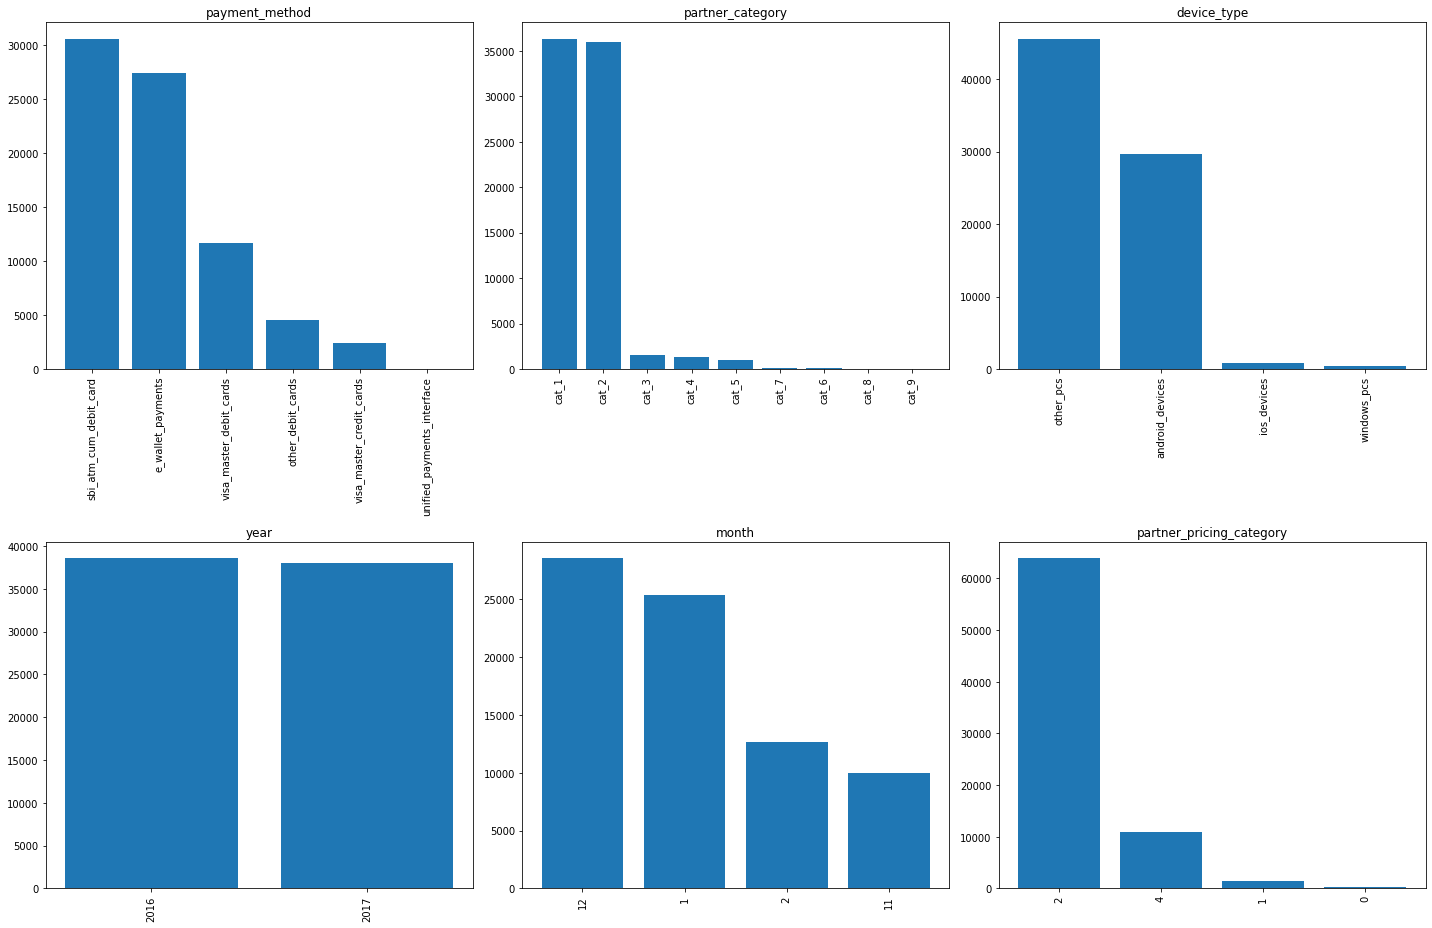

In [ ]:
cat_columns = ['payment_method', 'partner_category', 'device_type', 'year', 'month', 'partner_pricing_category']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20,13))

counter = 0
for cat_column in cat_columns:
    value_counts = dataset[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1
plt.tight_layout()
plt.show()

### @ Analysis of Target variable

It is very important to look at the target variable column, which holds the information, which we are going to predict. In our case we should compare its values to other columns.

First of all we should look at the number of 1's and 0's values in the response column .

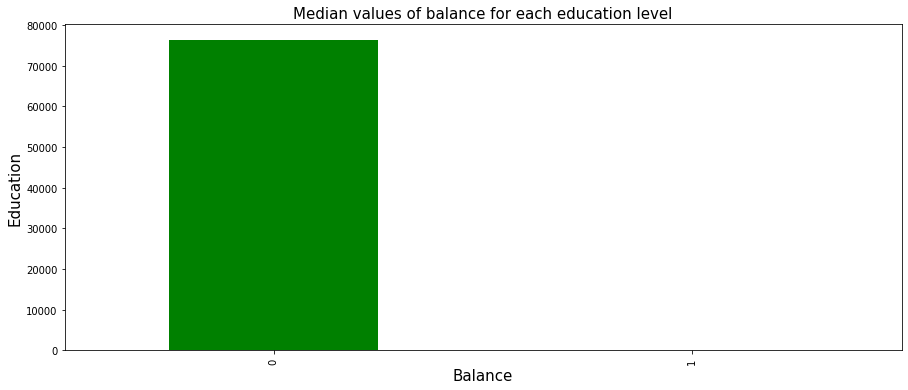

In [ ]:
edu = dataset['is_fraud'].value_counts().plot(kind = 'bar', color = 'green', figsize = (15,6))
edu.set_xlabel('Balance',fontsize = 15)
edu.set_ylabel('Education',fontsize = 15)
edu.set_title('Median values of balance for each education level',fontsize = 15)
plt.show()

In [ ]:
dataset['is_fraud'].value_counts()

0    76375
1      154
Name: is_fraud, dtype: int64

### As we can observe from the above figure that '0'(no) and '1'(yes) varies too much from each other.

### Therefore this scenerio represents a case of Imbalanced class. Imbalanced Classes arises from classification problems where the classes are not represented equally.
- And because my dataset is biased and imbalanced i cannot do slicing of data or inferential statistics because it give me wrong results because count of frauds are only 154 and non frauds are 76375.

### @ Performing bi-variate analysis to identify the features that are directly associated with the target variable.

#### Let's see how 'is_fraud' column value varies depending on other categorical columns' values:

### Visualization

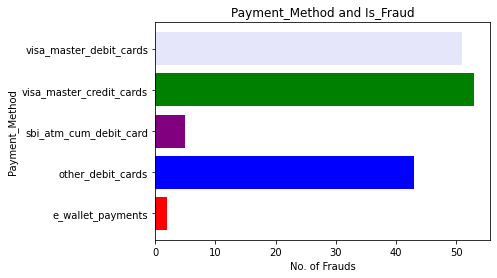

In [ ]:
# which payment method is used for frauds the most?
labels = ['e_wallet_payments', 'other_debit_cards', 'sbi_atm_cum_debit_card', 'visa_master_credit_cards', 'visa_master_debit_cards']
values = [2,43,5,53,51]


plt.barh(labels, values, color=['red', 'blue', 'purple', 'green', 'lavender'])
plt.ylabel('Payment_Method')
plt.xlabel('No. of Frauds')
plt.title('Payment_Method and Is_Fraud')
plt.show()



We can observe here that most of the frauds are done using visa master credit cards, visa master debit card, and other debit cards. 

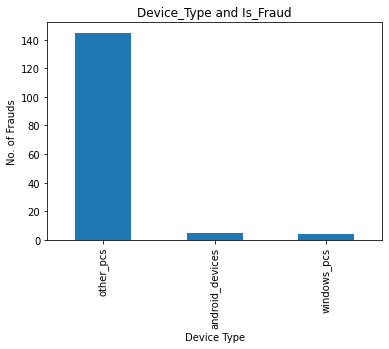

In [ ]:
# which device type is used for frauds the most?
dev = pd.DataFrame()

dev = dataset[dataset['is_fraud'] == 1]['device_type'].value_counts()
plt.xlabel('Device Type')
plt.ylabel('No. of Frauds')

dev.plot.bar(title = 'Device_Type and Is_Fraud')

In [ ]:
dev

other_pcs          145
android_devices      5
windows_pcs          4
Name: device_type, dtype: int64

We can observe from above chart that most of the frauds occured on other pcs, then 5 frauds on android devices, and 4 on window_pcs, and no fraud occured on IOS devices . 

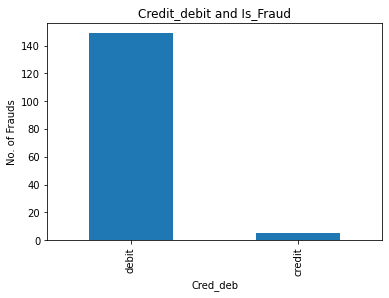

In [ ]:
# In which transaction type(Debit/Credit) most of the frauds occured?
cred_deb = pd.DataFrame()

cred_deb = dataset[dataset['is_fraud'] == 1]['cred_deb'].value_counts()
plt.xlabel('Cred_deb')
plt.ylabel('No. of Frauds')

cred_deb.plot.bar(title = 'Credit_debit and Is_Fraud')

In [ ]:
cred_deb

debit     149
credit      5
Name: cred_deb, dtype: int64

We can observe here that most of the fraud occured in a debit transaction.

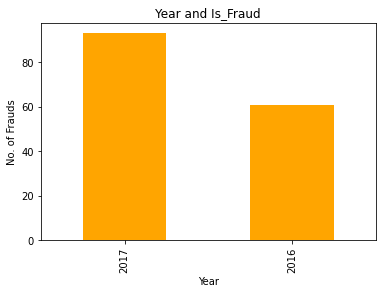

In [ ]:
#In which year more number of frauds occured?
yearf = pd.DataFrame()

yearf = dataset[dataset['is_fraud'] == 1]['year'].value_counts()
plt.xlabel('Year')
plt.ylabel('No. of Frauds')

yearf.plot.bar(title = 'Year and Is_Fraud',color = 'orange')

In [ ]:
yearf

2017    93
2016    61
Name: year, dtype: int64

More number of frauds occured in 2017 than 2016

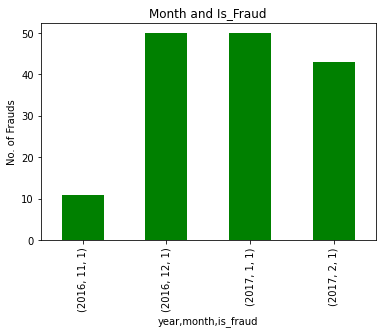

In [ ]:
#In which month of the year number of frauds are high?
monthf = pd.DataFrame()

monthf = dataset[dataset['is_fraud'] == 1].groupby(['year','month'])['is_fraud'].value_counts()
plt.xlabel('Month')
plt.ylabel('No. of Frauds')

monthf.plot.bar(title = 'Month and Is_Fraud', color = 'green')

In [ ]:
# dataset.groupby(['year','month'])['is_fraud'].value_counts()
monthf

year  month  is_fraud
2016  11     1           11
      12     1           50
2017  1      1           50
      2      1           43
Name: is_fraud, dtype: int64

In 2016 december and 2017 january, february fraud rate is high. 

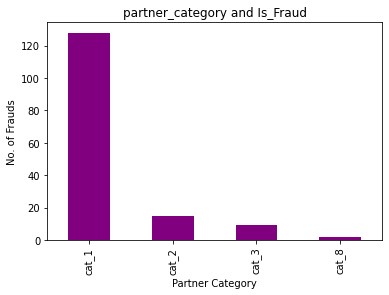

In [ ]:
# In which partner category more number of frauds has occurred?
parcf = pd.DataFrame()

parcf = dataset[dataset['is_fraud'] == 1]['partner_category'].value_counts()
plt.xlabel('Partner Category')
plt.ylabel('No. of Frauds')

parcf.plot.bar(title = 'partner_category and Is_Fraud',color = 'purple')

In [ ]:
parcf

cat_1    128
cat_2     15
cat_3      9
cat_8      2
Name: partner_category, dtype: int64

 From above chart we can observe here that partner category cat_1 most frauds have occurred.

In [ ]:
fraud_det = dataset

In [ ]:
fraud_det.drop(['day'], axis = 1, inplace = True) 

In [ ]:
fraud_det.drop(['transaction_initiation'], axis = 1, inplace= True)

# Data Preprocessing

In [ ]:
# Here I am creating dummy variable for categorical data.
fraud_det = pd.get_dummies(fraud_det,columns = ['payment_method','partner_category','country','device_type','cred_deb','year',
                                   'month','partner_pricing_category'], drop_first = True)

In [ ]:
fraud_det

,transaction_number,user_id,partner_id,money_transacted,is_fraud,payment_method_other_debit_cards,payment_method_sbi_atm_cum_debit_card,payment_method_unified_payments_interface,payment_method_visa_master_credit_cards,payment_method_visa_master_debit_cards,partner_category_cat_2,partner_category_cat_3,partner_category_cat_4,partner_category_cat_5,partner_category_cat_6,partner_category_cat_7,partner_category_cat_8,partner_category_cat_9,device_type_ios_devices,device_type_other_pcs,device_type_windows_pcs,cred_deb_debit,year_2017,month_2,month_11,month_12,partner_pricing_category_1,partner_pricing_category_2,partner_pricing_category_4
0,144703125000,17539344,47334,-5.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,77406814453032,24710841,78890,100.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0
2,308929485482801,24265476,78890,50.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0
3,665270027747073,10240000,102557,1000.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0
4,38276160171101,5880625,118335,200.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76524,179759462245453,19686969,47334,-100.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
76525,2693567760244353,11662225,118335,200.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0
76526,119750257089000,374544,47334,-3.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
76527,1949798765017089,1687401,47334,-20.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
fraud_det.shape

(76529, 29)

In [ ]:
#Splitting dataset into dependent and independent variables.
X = fraud_det.loc[:,fraud_det.columns != 'is_fraud']
y = fraud_det.loc[:,fraud_det.columns == 'is_fraud']
y=y.astype('int')
# y =y.to_numpy()
# X = X.to_numpy()

In [ ]:
X.shape

(76529, 28)

In [ ]:
y.shape

(76529, 1)

In [ ]:
#Splitting the dataset into training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
#print lenght of both test and train set
print('shape of X_train : ',len(X_train), '\nshape of y_train : ',len(y_train))
print('\nshape of X_test  : ',len(X_test), '\nshape of y_test  : ',len(y_test))

shape of X_train :  57396 
shape of y_train :  57396

shape of X_test  :  19133 
shape of y_test  :  19133


# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#min max scalar
# statrified sampling

# Predictive Model 1: Logistic Regression

Training the Logistic Regression Model on the Training set

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#training accuracy
classifier.score(X_train,y_train)

0.9984145236601853

In [ ]:
#testing accuracy
classifier.score(X_test,y_test)

0.9981184341190613

In [ ]:
y_pred = classifier.predict(X_test)

 Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
score = accuracy_score(y_test, y_pred)
score

[[19076    12]
 [   24    21]]


0.9981184341190613

Text(0.5, 1.0, 'Accuracy Score: 0.9981184341190613')

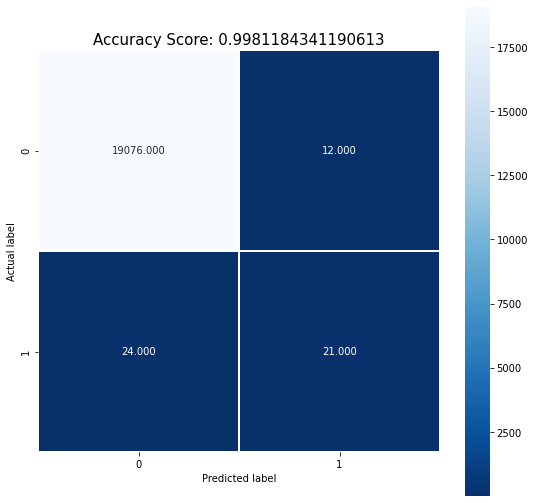

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

From above confusion matrix we can observe that 21 are predicted 1's(yes) out of 45 and 24 are predicted false.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19088
           1       0.64      0.47      0.54        45

    accuracy                           1.00     19133
   macro avg       0.82      0.73      0.77     19133
weighted avg       1.00      1.00      1.00     19133



In [ ]:
# from above report we can tell that recall must be more higher .

Estimating the model performance using K-fold Cross Validation

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
  # prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [ ]:
# evaluate model
scores = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f' % (mean(scores)))

Accuracy: 0.998


In [ ]:
# The k-fold cross-validation procedure 
# divides a limited dataset into k non-overlapping folds. 
# Each of the k folds is given an opportunity to be used 
# as a held back test set, whilst all other folds 
# collectively are used as a training dataset.

# Predictive model 2: Decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
#Training Accuracy 
classifier.score(X_train, y_train)

1.0

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
score = accuracy_score(y_test, y_pred)
score

[[19080     8]
 [    3    42]]


0.9994250770919354

Text(0.5, 1.0, 'Accuracy Score: 0.9994250770919354')

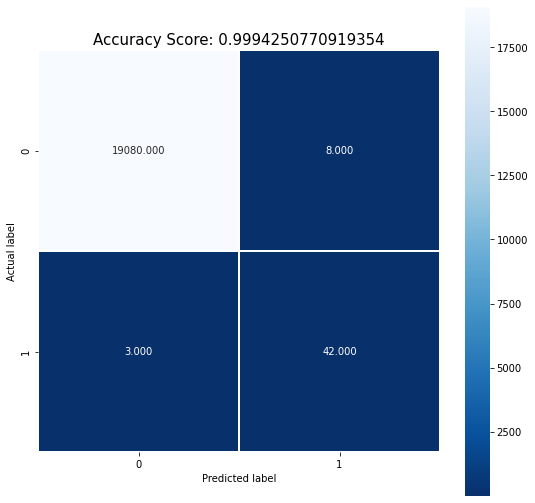

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [ ]:
## From above confusion matrix we can observe that out of 45 1's(yes) this model predicted 41 1's correctly.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19088
           1       0.84      0.93      0.88        45

    accuracy                           1.00     19133
   macro avg       0.92      0.97      0.94     19133
weighted avg       1.00      1.00      1.00     19133



# Predictive model 3: Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
#training accuracy
classifier.score(X_train, y_train)

1.0

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
score = accuracy_score(y_test, y_pred)
score

[[19082     6]
 [   13    32]]


0.9990069513406157

Text(0.5, 1.0, 'Accuracy Score: 0.9990069513406157')

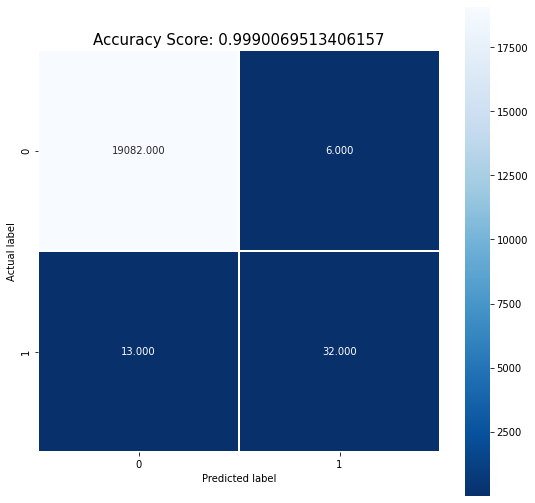

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [ ]:
# This model predicted 32 1's correctly out of 45, and also predicted 6 0's as 1's.

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19088
           1       0.84      0.71      0.77        45

    accuracy                           1.00     19133
   macro avg       0.92      0.86      0.89     19133
weighted avg       1.00      1.00      1.00     19133



## **Now I will perform hyperparameter tuning to find best attributes and features to make my model better**


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

est = RandomForestClassifier(n_jobs=-1)
rf_p_dist={'max_depth':[3,5,10,20,30,40],
              'n_estimators':[10,20,30,40,50],
              'max_features':randint(1,30),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,30)
              }

In [ ]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X_scale = pd.DataFrame(scale(X))
X_scale.columns = cols
X_scale.columns

Index(['transaction_number', 'user_id', 'partner_id', 'money_transacted',
       'payment_method_other_debit_cards',
       'payment_method_sbi_atm_cum_debit_card',
       'payment_method_unified_payments_interface',
       'payment_method_visa_master_credit_cards',
       'payment_method_visa_master_debit_cards', 'partner_category_cat_2',
       'partner_category_cat_3', 'partner_category_cat_4',
       'partner_category_cat_5', 'partner_category_cat_6',
       'partner_category_cat_7', 'partner_category_cat_8',
       'partner_category_cat_9', 'device_type_ios_devices',
       'device_type_other_pcs', 'device_type_windows_pcs', 'cred_deb_debit',
       'year_2017', 'month_2', 'month_11', 'month_12',
       'partner_pricing_category_1', 'partner_pricing_category_2',
       'partner_pricing_category_4'],
      dtype='object')

In [ ]:
def hypertuning_rscv(est, p_distr, nbr_iter,X_scale,y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(X_scale,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score



In [ ]:
rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 10, X_scale, y)

In [ ]:
rf_parameters

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 25,
 'min_samples_leaf': 22,
 'n_estimators': 10}

In [ ]:
rf_ht_score

0.9994511879248564

## Now Building random forest classifier using above parameters

In [ ]:
classifier=RandomForestClassifier(n_jobs=-1, n_estimators=10,bootstrap= False,criterion='entropy',max_depth=30,max_features=19,min_samples_leaf= 5)

classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=30, max_features=19,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

score = accuracy_score(y_test, y_pred)
score

[[19083     5]
 [    8    37]]


0.9993205456541054

Text(0.5, 1.0, 'Accuracy Score: 0.9993205456541054')

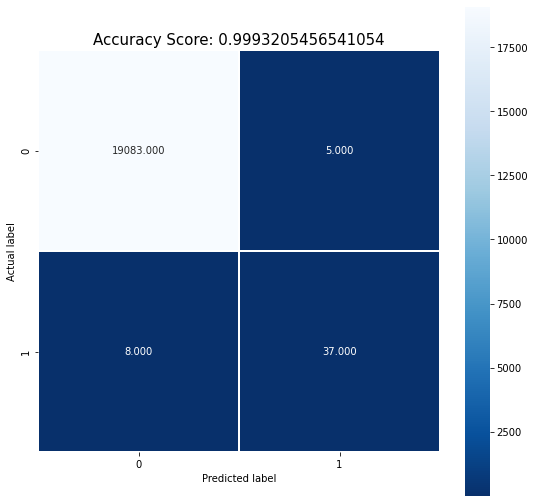

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

Here we can observe that out of 45 1's, 39 1's are predicted correctly.

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19088
           1       0.88      0.82      0.85        45

    accuracy                           1.00     19133
   macro avg       0.94      0.91      0.93     19133
weighted avg       1.00      1.00      1.00     19133



Here we can see that precision is quite high, that means this model is not predicting wrong 1's, i.e false positive are decreased, which is good.

In [ ]:
# K-fold cross validation
# evaluate model
scores = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f' % (mean(scores)))

Accuracy: 1.000


# Predictive Model 4: XGBClassifier

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#predicting test results
y_pred = model.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[19085     3]
 [    7    38]]


0.9994773428108503

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19088
           1       0.93      0.84      0.88        45

    accuracy                           1.00     19133
   macro avg       0.96      0.92      0.94     19133
weighted avg       1.00      1.00      1.00     19133



## **Now I will Try using some Feature Selection Methods to select only that feature which makes our model robust and better.**

**Feature selection method 1: Backward Elimination**

In [ ]:
#Adding constant column of ones, mandatory for sm.OLS model
import statsmodels.regression.linear_model as lm
import statsmodels.regression.linear_model as sm
import statsmodels.api as smm
X_1 = smm.add_constant(X)
#Fitting sm.OLS model
model = lm.OLS(y,X_1).fit()
model.pvalues

const                                        0.000000e+00
transaction_number                           2.020769e-01
user_id                                      9.369746e-14
partner_id                                   6.161084e-01
money_transacted                             0.000000e+00
payment_method_other_debit_cards             0.000000e+00
payment_method_sbi_atm_cum_debit_card        0.000000e+00
payment_method_unified_payments_interface    0.000000e+00
payment_method_visa_master_credit_cards      0.000000e+00
payment_method_visa_master_debit_cards       0.000000e+00
partner_category_cat_2                       0.000000e+00
partner_category_cat_3                       0.000000e+00
partner_category_cat_4                       0.000000e+00
partner_category_cat_5                       0.000000e+00
partner_category_cat_6                       0.000000e+00
partner_category_cat_7                       0.000000e+00
partner_category_cat_8                       0.000000e+00
partner_catego

In [ ]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = smm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['user_id', 'money_transacted', 'payment_method_other_debit_cards', 'payment_method_sbi_atm_cum_debit_card', 'payment_method_visa_master_credit_cards', 'partner_category_cat_3', 'partner_category_cat_5', 'partner_category_cat_7', 'partner_category_cat_8', 'device_type_other_pcs', 'device_type_windows_pcs', 'cred_deb_debit', 'year_2017', 'month_11', 'month_12', 'partner_pricing_category_1', 'partner_pricing_category_2', 'partner_pricing_category_4']


**Now I will build model on only above redundant features and check for accuracy**

In [ ]:
# Again splitting
X = fraud_det.loc[:, ['user_id', 'money_transacted', 'payment_method_other_debit_cards', 'payment_method_sbi_atm_cum_debit_card', 'payment_method_visa_master_credit_cards', 'partner_category_cat_3', 'partner_category_cat_5', 'partner_category_cat_7', 'partner_category_cat_8', 'device_type_other_pcs', 'device_type_windows_pcs', 'cred_deb_debit', 'year_2017', 'month_11', 'month_12', 'partner_pricing_category_1', 'partner_pricing_category_2', 'partner_pricing_category_4']]
y = fraud_det.loc[:,['is_fraud']]
y=y.astype('int')

from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

# Training testing split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# #feature scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

**Logistic Regression**



In [ ]:
#creating logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

#predicting X_test data
y_pred = classifier.predict(X_test)

In [ ]:
#confusion matrix and accuracy of my model
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
score = accuracy_score(y_test, y_pred)
score

[[19076    12]
 [   23    22]]


0.9981706998379762

Text(0.5, 1.0, 'Accuracy Score: 0.9981706998379762')

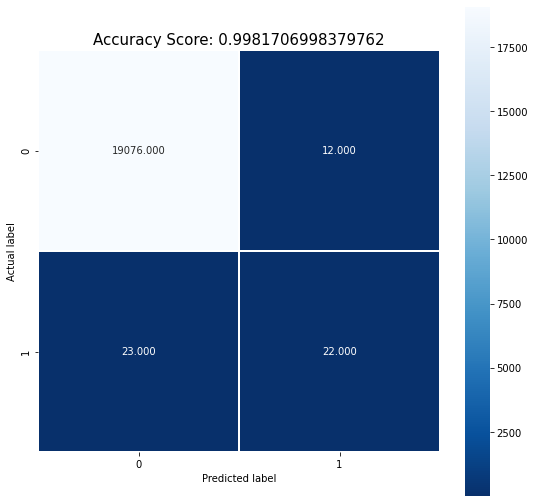

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19088
           1       0.65      0.49      0.56        45

    accuracy                           1.00     19133
   macro avg       0.82      0.74      0.78     19133
weighted avg       1.00      1.00      1.00     19133



**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
#predicting X_test data
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
score = accuracy_score(y_test, y_pred)
score

[[19083     5]
 [    2    43]]


0.9996341399675952

Text(0.5, 1.0, 'Accuracy Score: 0.9996341399675952')

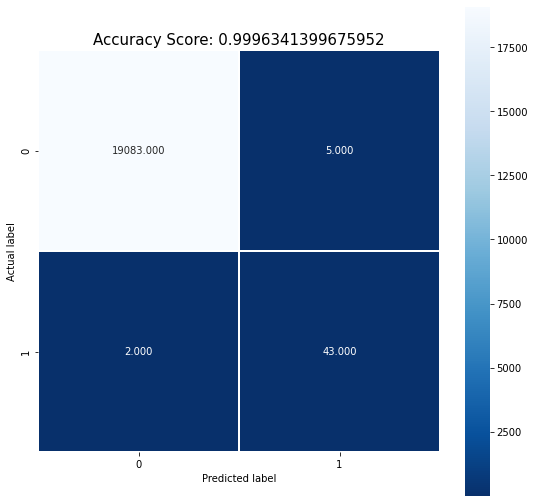

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19088
           1       0.90      0.96      0.92        45

    accuracy                           1.00     19133
   macro avg       0.95      0.98      0.96     19133
weighted avg       1.00      1.00      1.00     19133



**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
#predicting X_test data
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
score = accuracy_score(y_test, y_pred)
score

[[19080     8]
 [    9    36]]


0.9991114827784456

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19088
           1       0.82      0.80      0.81        45

    accuracy                           1.00     19133
   macro avg       0.91      0.90      0.90     19133
weighted avg       1.00      1.00      1.00     19133



# **Bi-directional Elimination**

In [ ]:
fraud_det.columns

Index(['transaction_number', 'user_id', 'partner_id', 'money_transacted',
       'is_fraud', 'payment_method_other_debit_cards',
       'payment_method_sbi_atm_cum_debit_card',
       'payment_method_unified_payments_interface',
       'payment_method_visa_master_credit_cards',
       'payment_method_visa_master_debit_cards', 'partner_category_cat_2',
       'partner_category_cat_3', 'partner_category_cat_4',
       'partner_category_cat_5', 'partner_category_cat_6',
       'partner_category_cat_7', 'partner_category_cat_8',
       'partner_category_cat_9', 'device_type_ios_devices',
       'device_type_other_pcs', 'device_type_windows_pcs', 'cred_deb_debit',
       'year_2017', 'month_2', 'month_11', 'month_12',
       'partner_pricing_category_1', 'partner_pricing_category_2',
       'partner_pricing_category_4'],
      dtype='object')

In [ ]:
#Splitting dataset into dependent and independent variables.

# In Independent variables I am using all the features other than 'transaction_number', 'user_id', 'partner_id'

X = fraud_det.loc[:,['user_id','money_transacted',
       'payment_method_visa_master_credit_cards','payment_method_unified_payments_interface',
       'payment_method_visa_master_debit_cards', 
       'partner_category_cat_3'
       ]]
y = fraud_det.loc[:,fraud_det.columns == 'is_fraud']
y=y.astype('int')


In [ ]:
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['user_id', 'money_transacted',
       'payment_method_visa_master_credit_cards',
       'payment_method_unified_payments_interface',
       'payment_method_visa_master_debit_cards', 'partner_category_cat_3'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


# Logistic Regression

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
score = accuracy_score(y_test, y_pred)
score

[[19077    11]
 [   23    22]]


0.9982229655568913

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19088
           1       0.67      0.49      0.56        45

    accuracy                           1.00     19133
   macro avg       0.83      0.74      0.78     19133
weighted avg       1.00      1.00      1.00     19133



# Decision Tree Classifier

In [ ]:
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
score = accuracy_score(y_test, y_pred)
score

[[19082     6]
 [    2    43]]


0.9995818742486803

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19088
           1       0.88      0.96      0.91        45

    accuracy                           1.00     19133
   macro avg       0.94      0.98      0.96     19133
weighted avg       1.00      1.00      1.00     19133



# Random Forest Classifier

In [ ]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
score = accuracy_score(y_test, y_pred)
score

[[19082     6]
 [    2    43]]


0.9995818742486803

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19088
           1       0.88      0.96      0.91        45

    accuracy                           1.00     19133
   macro avg       0.94      0.98      0.96     19133
weighted avg       1.00      1.00      1.00     19133



After too many iterations of training and testing the model with different features and checking the accuracy each time with different feature.
In each iteration I have added or substracted feature and check the accuracy and confusion matrix each time, and finally I got the best accuracy with following features :

> 'user_id','money_transacted',
       'payment_method_visa_master_credit_cards','payment_method_unified_payments_interface',
       'payment_method_visa_master_debit_cards', 
       'partner_category_cat_3'

With Both Decision Tree Classifier and Random Forest Classifier model I got best and same accuracy. Both model predicted correct 43 number of 1's(yes) out of 45 number of 1's.



# Using Recursive Feature Elimination to select top N features in an automated fashion




In [ ]:
#Splitting dataset into dependent and independent variables.
X = fraud_det.loc[:,fraud_det.columns != 'is_fraud']
y = fraud_det.loc[:,fraud_det.columns == 'is_fraud']
y=y.astype('int')
X = X.drop('partner_id', axis = 1)

In [ ]:
# cols = X.columns
# X = pd.DataFrame(scale(X))
# X.columns = cols
# X.columns

In [ ]:
X.shape

(76529, 27)

Finding Top n features


In [ ]:
# # importing necessary libary for RFE
from sklearn.feature_selection import RFE
# #no of features
# nof_list=np.arange(1,28)            
# high_score=0
# #Variable to store the optimum features
# nof=0           
# score_list =[]
# for n in range(len(nof_list)):
#     X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)
#     model = LogisticRegression()
#     rfe = RFE(model,nof_list[n])
#     X_train_rfe = rfe.fit_transform(X_train,y_train)
#     X_test_rfe = rfe.transform(X_test)
#     model.fit(X_train_rfe,y_train)
#     score = model.score(X_test_rfe,y_test)
#     score_list.append(score)
#     if(score>high_score):
#         high_score = score
#         nof = nof_list[n]
# print("Optimum number of features: %d" %nof)
# print("Score with %d features: %f" % (nof, high_score))

In [ ]:
cols = list(X.columns)
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model,10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['user_id', 'money_transacted', 'payment_method_sbi_atm_cum_debit_card',
       'partner_category_cat_2', 'device_type_other_pcs', 'cred_deb_debit',
       'year_2017', 'month_2', 'month_12', 'partner_pricing_category_2'],
      dtype='object')


In [ ]:
#Splitting dataset into dependent and independent variables.
X = fraud_det.loc[:,['user_id', 'money_transacted', 'payment_method_sbi_atm_cum_debit_card',
       'partner_category_cat_2', 'device_type_other_pcs', 'cred_deb_debit',
       'year_2017', 'month_2', 'month_12', 'partner_pricing_category_2']]
y = fraud_det.loc[:,fraud_det.columns == 'is_fraud']
y=y.astype('int')

In [ ]:
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['user_id', 'money_transacted', 'payment_method_sbi_atm_cum_debit_card',
       'partner_category_cat_2', 'device_type_other_pcs', 'cred_deb_debit',
       'year_2017', 'month_2', 'month_12', 'partner_pricing_category_2'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


Logistic Regression

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
score = accuracy_score(y_test, y_pred)
score

[[19073    15]
 [   25    20]]


0.9979093712434014

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19088
           1       0.57      0.44      0.50        45

    accuracy                           1.00     19133
   macro avg       0.79      0.72      0.75     19133
weighted avg       1.00      1.00      1.00     19133



Decision Tree

In [ ]:
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
score = accuracy_score(y_test, y_pred)
score

[[19084     4]
 [    3    42]]


0.9996341399675952

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19088
           1       0.91      0.93      0.92        45

    accuracy                           1.00     19133
   macro avg       0.96      0.97      0.96     19133
weighted avg       1.00      1.00      1.00     19133



Random Forest

In [ ]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
score = accuracy_score(y_test, y_pred)
score

[[19083     5]
 [    5    40]]


0.9994773428108503

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19088
           1       0.89      0.89      0.89        45

    accuracy                           1.00     19133
   macro avg       0.94      0.94      0.94     19133
weighted avg       1.00      1.00      1.00     19133

